In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

#### b) blurring + contrast 
#### c) contrast 
#### d) no preprocessing. 
If you also did the same analysis using the images w no padding (raw images), you could obtain the same metrics. You would just have to change the file path to the directory. The code for the blurring is in Dev's notebook on github
Do Padded and UnPadded for each of these

# Blurring + Contrast

In [14]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def blur_contrast(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale if the image is in color
    if len(blurred_image.shape) > 2:
        blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if blurred_image.dtype != 'uint8':
        blurred_image = cv2.convertScaleAbs(blurred_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(blurred_image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = blur_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_bc_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_bc_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_bc_raw))  # Accessing the data of the first image


662


In [15]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(142,148))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_bc_raw = classify_images_with_precomputed_l1(image_data_list_bc_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_bc_raw)


[142, 143, 144, 145, 146, 147]
Correct Counts: [422, 430, 427, 430, 427, 425]
Incorrect Counts: [240, 232, 235, 232, 235, 237]
Accuracies: {'142': 0.6374622356495468, '143': 0.649546827794562, '144': 0.6450151057401813, '145': 0.649546827794562, '146': 0.6450151057401813, '147': 0.6419939577039275}


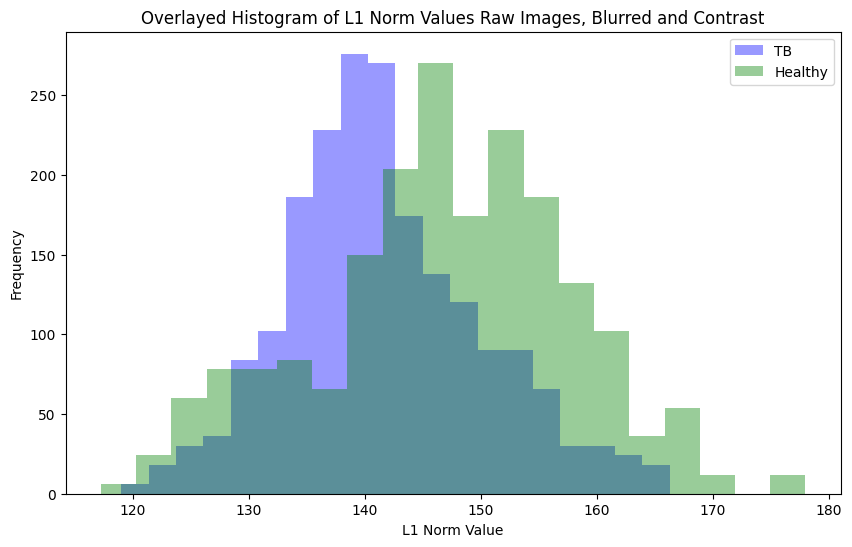

In [16]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, Blurred and Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

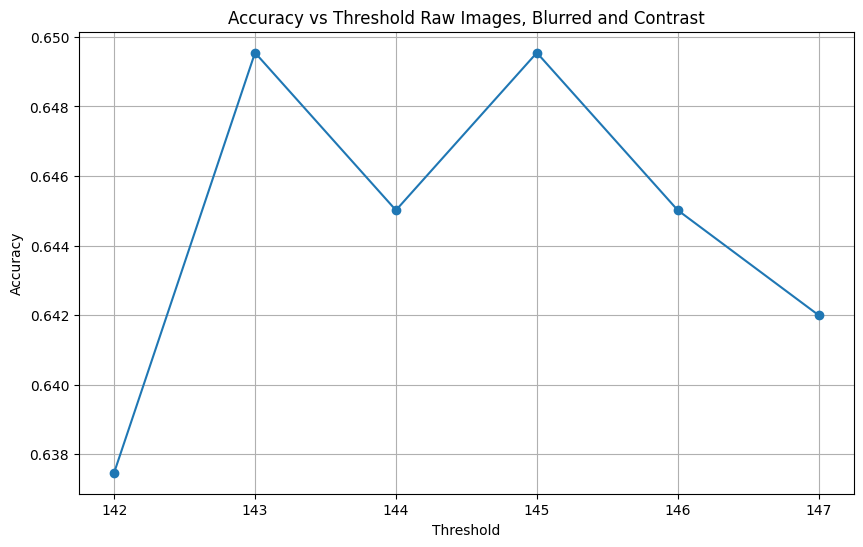

In [17]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_bc_raw.keys()))
accuracy_values = list(map(float, results_bc_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images, Blurred and Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [18]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def blur_contrast(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale if the image is in color
    if len(blurred_image.shape) > 2:
        blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if blurred_image.dtype != 'uint8':
        blurred_image = cv2.convertScaleAbs(blurred_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(blurred_image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = blur_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_bc_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_bc_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_bc_clean))  # Accessing the data of the first image


662


In [19]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(105, 111))

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_bc_clean = classify_images_with_precomputed_l1(image_data_list_bc_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_bc_clean)


[105, 106, 107, 108, 109, 110]
Correct Counts: [437, 449, 450, 452, 456, 455]
Incorrect Counts: [225, 213, 212, 210, 206, 207]
Accuracies: {'105': 0.6601208459214502, '106': 0.6782477341389728, '107': 0.6797583081570997, '108': 0.6827794561933535, '109': 0.6888217522658611, '110': 0.6873111782477341}


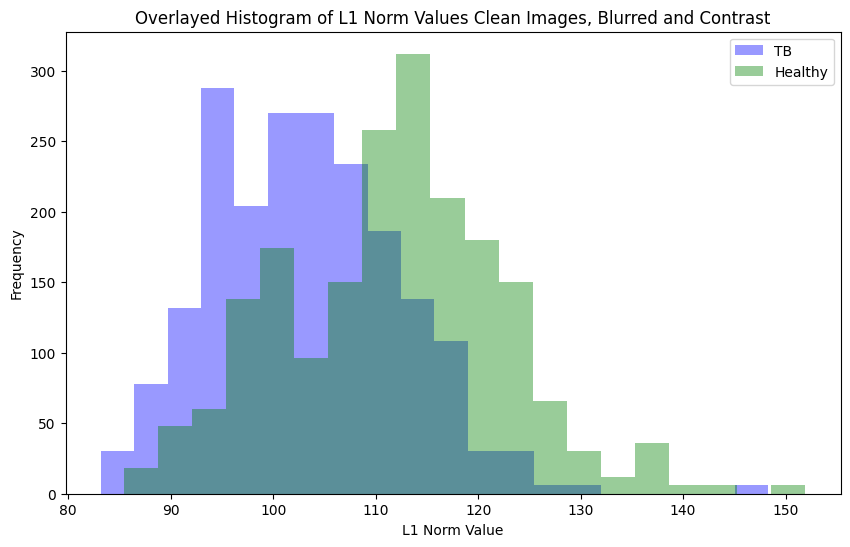

In [20]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, Blurred and Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

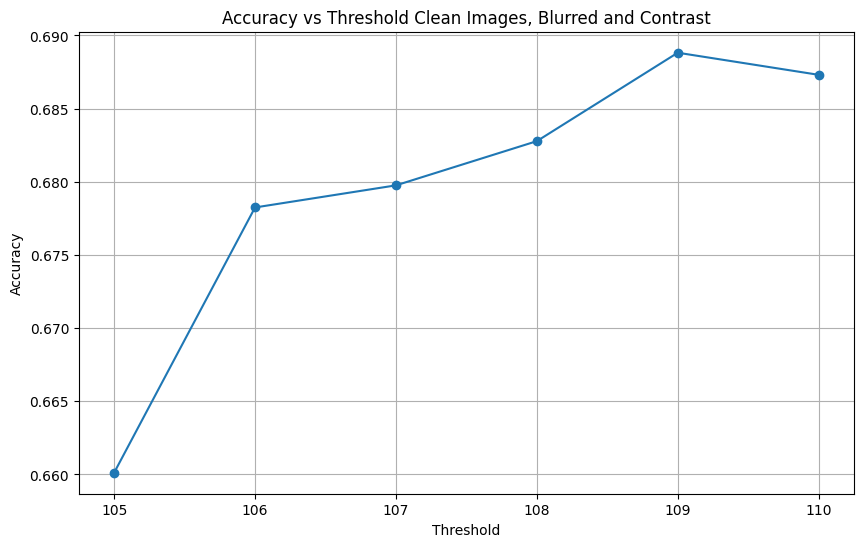

In [21]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_bc_clean.keys()))
accuracy_values = list(map(float, results_bc_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Clean Images, Blurred and Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Contrast

In [22]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def increase_contrast(image, box_size=8, lim=2):
    """
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    """
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if image.dtype != 'uint8':
        image = cv2.convertScaleAbs(image)

    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)


def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = increase_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_c_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_c_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_c_raw))  # Accessing the data of the first image


662


In [23]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(142, 146))

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_c_raw = classify_images_with_precomputed_l1(image_data_list_c_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_c_raw)


[142, 143, 144, 145]
Correct Counts: [431, 430, 434, 432]
Incorrect Counts: [231, 232, 228, 230]
Accuracies: {'142': 0.6510574018126888, '143': 0.649546827794562, '144': 0.6555891238670695, '145': 0.6525679758308157}


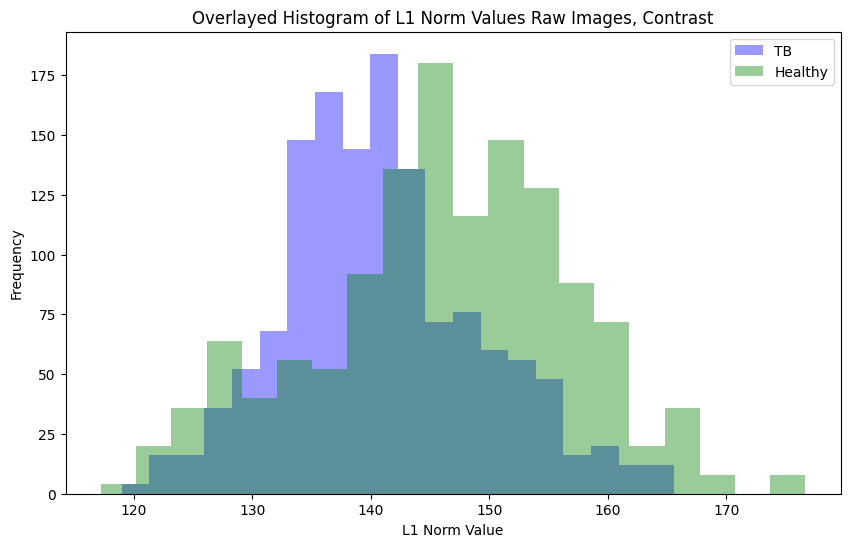

In [24]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

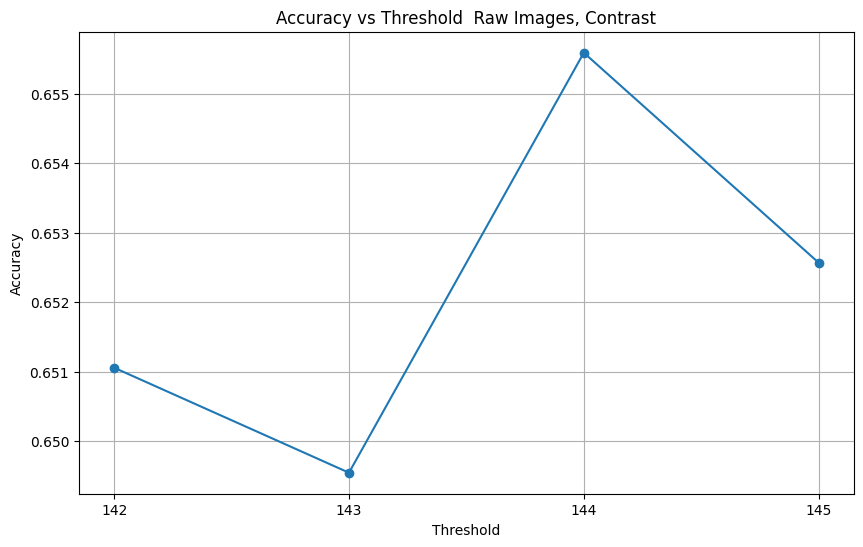

In [25]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_c_raw.keys()))
accuracy_values = list(map(float, results_c_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold  Raw Images, Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [26]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response

def increase_contrast(image, box_size=8, lim=2):
    """
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    """
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is in the correct format for CLAHE
    if image.dtype != 'uint8':
        image = cv2.convertScaleAbs(image)

    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)


def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    image_bc = increase_contrast(current_image)
    l1_norm = calculate_l1_norm(image_bc)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_c_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_c_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_c_clean))  # Accessing the data of the first image


662


In [27]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(106, 112))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_c_clean = classify_images_with_precomputed_l1(image_data_list_c_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_c_clean)


[106, 107, 108, 109, 110, 111]
Correct Counts: [453, 453, 454, 458, 455, 450]
Incorrect Counts: [209, 209, 208, 204, 207, 212]
Accuracies: {'106': 0.6842900302114804, '107': 0.6842900302114804, '108': 0.6858006042296072, '109': 0.6918429003021148, '110': 0.6873111782477341, '111': 0.6797583081570997}


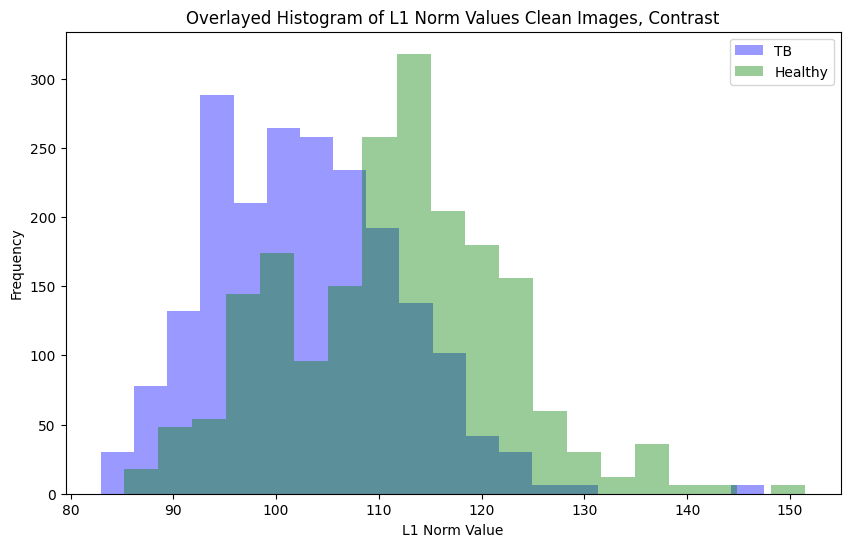

In [28]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, Contrast')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

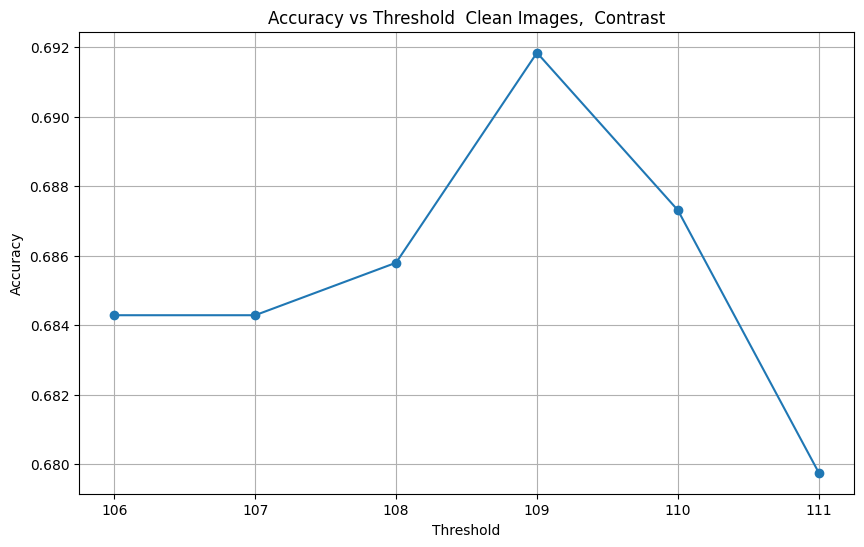

In [29]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_c_clean.keys()))
accuracy_values = list(map(float, results_c_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold  Clean Images,  Contrast')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# No Processing

In [30]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    if len(image.shape) > 2:  # For colored images (3 dimensions)
        height, width, channels = image.shape
    else:  # For grayscale images (2 dimensions)
        height, width = image.shape
        channels = 1

    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height * channels)  # Consider channels in calculation

    return l1_norm_response


def process_image(image_path):
    current_image = cv2.imread(image_path)
    l1_norm = calculate_l1_norm(current_image)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list_np_raw = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_np_raw.append(image_data)


# Example usage of stored data
print(len(image_data_list_np_raw))  # Accessing the data of the first image


662


In [31]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(0, 5))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_np_raw = classify_images_with_precomputed_l1(image_data_list_np_raw, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_np_raw)


[0, 1, 2, 3, 4]
Correct Counts: [326, 322, 315, 307, 303]
Incorrect Counts: [336, 340, 347, 355, 359]
Accuracies: {'0': 0.49244712990936557, '1': 0.486404833836858, '2': 0.47583081570996977, '3': 0.4637462235649547, '4': 0.45770392749244715}


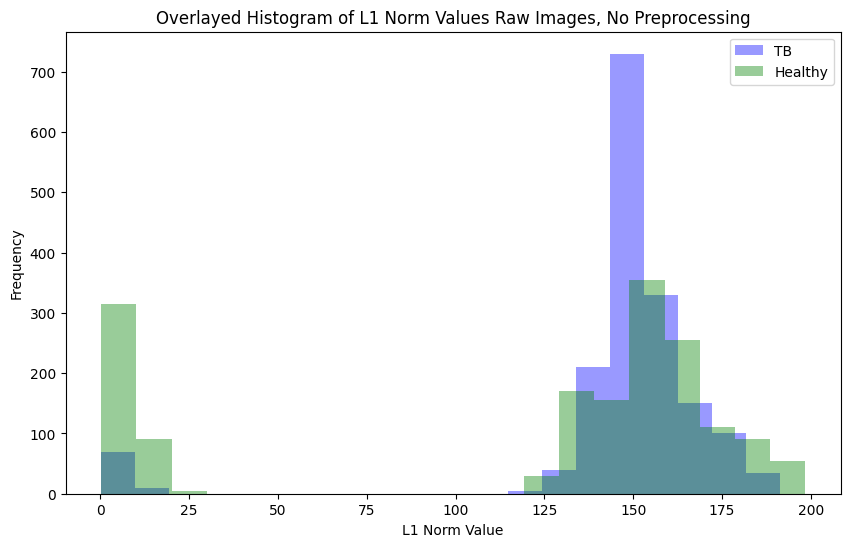

In [32]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Raw Images, No Preprocessing')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

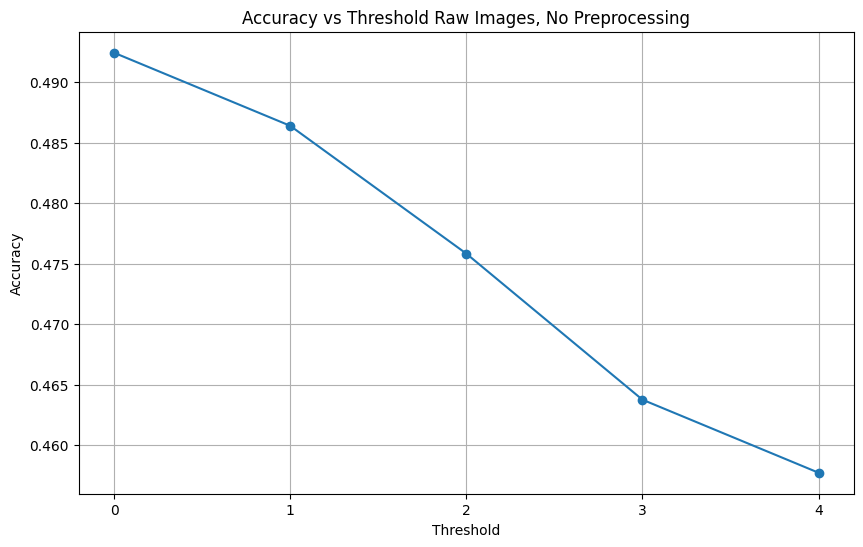

In [33]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_np_raw.keys()))
accuracy_values = list(map(float, results_np_raw.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images, No Preprocessing')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [34]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def calculate_l1_norm(image):
    if len(image.shape) > 2:  # For colored images (3 dimensions)
        height, width, channels = image.shape
    else:  # For grayscale images (2 dimensions)
        height, width = image.shape
        channels = 1

    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height * channels)  # Consider channels in calculation

    return l1_norm_response


def process_image(image_path):
    current_image = cv2.imread(image_path)
    l1_norm = calculate_l1_norm(current_image)
    
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "l1_norm": l1_norm,
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list_np_clean = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list_np_clean.append(image_data)


# Example usage of stored data
print(len(image_data_list_np_clean))  # Accessing the data of the first image


662


In [35]:
def classify_images_with_precomputed_l1(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['l1_norm']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = list(range(0, 10))


# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results_np_clean = classify_images_with_precomputed_l1(image_data_list_np_clean, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results_np_clean)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Correct Counts: [326, 312, 307, 306, 293, 291, 280, 274, 266, 265]
Incorrect Counts: [336, 350, 355, 356, 369, 371, 382, 388, 396, 397]
Accuracies: {'0': 0.49244712990936557, '1': 0.47129909365558914, '2': 0.4637462235649547, '3': 0.4622356495468278, '4': 0.4425981873111782, '5': 0.4395770392749245, '6': 0.4229607250755287, '7': 0.41389728096676737, '8': 0.40181268882175225, '9': 0.4003021148036254}


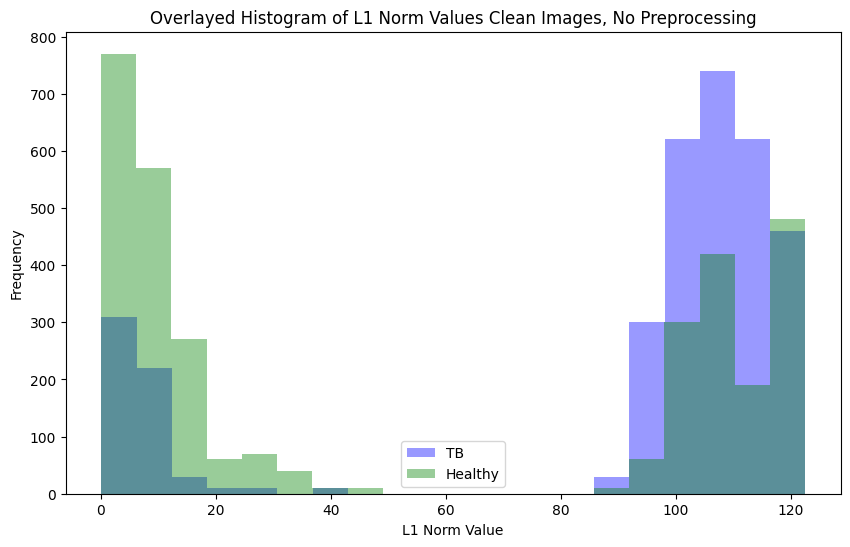

In [36]:
# print(correct, incorrect)

# print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values Clean Images, No Preprocessing')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

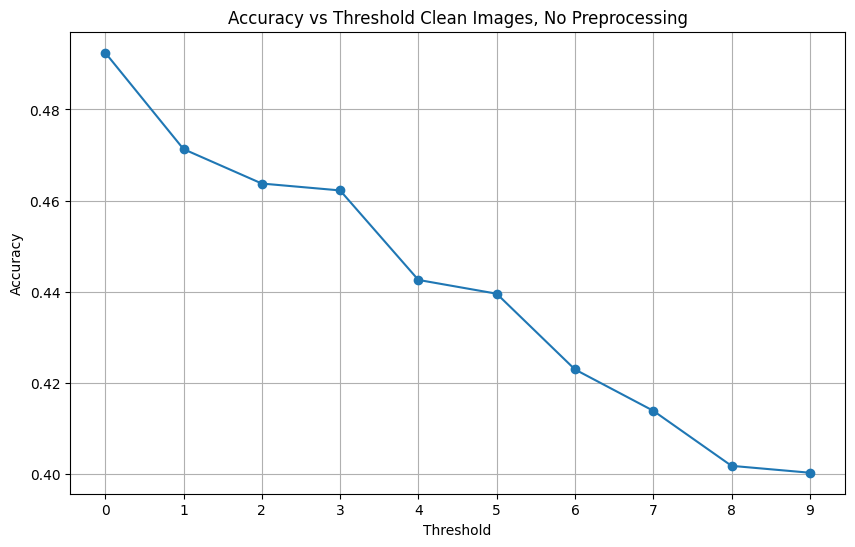

In [37]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results_np_clean.keys()))
accuracy_values = list(map(float, results_np_clean.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Clean Images, No Preprocessing')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

In [38]:
print(results_np_clean)
print(results_np_raw)
print(results_bc_clean)
print(results_bc_raw)
print(results_c_clean)
print(results_c_raw)


{'0': 0.49244712990936557, '1': 0.47129909365558914, '2': 0.4637462235649547, '3': 0.4622356495468278, '4': 0.4425981873111782, '5': 0.4395770392749245, '6': 0.4229607250755287, '7': 0.41389728096676737, '8': 0.40181268882175225, '9': 0.4003021148036254}
{'0': 0.49244712990936557, '1': 0.486404833836858, '2': 0.47583081570996977, '3': 0.4637462235649547, '4': 0.45770392749244715}
{'105': 0.6601208459214502, '106': 0.6782477341389728, '107': 0.6797583081570997, '108': 0.6827794561933535, '109': 0.6888217522658611, '110': 0.6873111782477341}
{'142': 0.6374622356495468, '143': 0.649546827794562, '144': 0.6450151057401813, '145': 0.649546827794562, '146': 0.6450151057401813, '147': 0.6419939577039275}
{'106': 0.6842900302114804, '107': 0.6842900302114804, '108': 0.6858006042296072, '109': 0.6918429003021148, '110': 0.6873111782477341, '111': 0.6797583081570997}
{'142': 0.6510574018126888, '143': 0.649546827794562, '144': 0.6555891238670695, '145': 0.6525679758308157}


In [39]:
max_np_clean = max(results_np_clean.items(), key=lambda x: x[1])
max_np_raw = max(results_np_raw.items(), key=lambda x: x[1])
max_bc_clean = max(results_bc_clean.items(), key=lambda x: x[1])
max_bc_raw = max(results_bc_raw.items(), key=lambda x: x[1])
max_c_clean = max(results_c_clean.items(), key=lambda x: x[1])
max_c_raw = max(results_c_raw.items(), key=lambda x: x[1])

# Print the keys and values of the maximums for each dictionary
print("Max values and their keys:")
print(f"results_np_clean: {max_np_clean}")
print(f"results_np_raw: {max_np_raw}")
print(f"results_bc_clean: {max_bc_clean}")
print(f"results_bc_raw: {max_bc_raw}")
print(f"results_c_clean: {max_c_clean}")
print(f"results_c_raw: {max_c_raw}")

Max values and their keys:
results_np_clean: ('0', 0.49244712990936557)
results_np_raw: ('0', 0.49244712990936557)
results_bc_clean: ('109', 0.6888217522658611)
results_bc_raw: ('143', 0.649546827794562)
results_c_clean: ('109', 0.6918429003021148)
results_c_raw: ('144', 0.6555891238670695)


In [40]:
import pandas as pd

data = {
    'results_np_clean': max_np_clean,
    'results_np_raw': max_np_raw,
    'results_bc_clean': max_bc_clean,
    'results_bc_raw': max_bc_raw,
    'results_c_clean': max_c_clean,
    'results_c_raw': max_c_raw,
}

# Create a DataFrame and transpose it to have the keys and values as rows
df = pd.DataFrame(data).T

# Set column names for better representation
df.columns = ['Threshold', 'Max Accuracy']

# Display the DataFrame
print(df)


                 Threshold Max Accuracy
results_np_clean         0     0.492447
results_np_raw           0     0.492447
results_bc_clean       109     0.688822
results_bc_raw         143     0.649547
results_c_clean        109     0.691843
results_c_raw          144     0.655589


In [56]:
# l1_norm_values = [data_dict["l1_norm"] for data_dict in image_data_list_bc_raw]
all_dict = []


tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_bc_raw if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_bc_raw if data_dict["label"] == 0]
ild_bc_raw = {
    "name": "Blur and Contrast Raw",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_bc_raw)

# ###########################################################################################

tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_bc_clean if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_bc_clean if data_dict["label"] == 0]
ild_bc_clean = {
    "name": "Blur and Contrast Clean",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_bc_clean)


# ###########################################################################################

tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_c_raw if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_c_raw if data_dict["label"] == 0]
ild_c_raw = {
    "name": "Contrast Raw",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_c_raw)


# ###########################################################################################

tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_c_clean if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_c_clean if data_dict["label"] == 0]
ild_c_clean = {
    "name": "Contrast Clean",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_c_clean)


# ###########################################################################################


tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_np_raw if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_np_raw if data_dict["label"] == 0]
ild_np_raw = {
    "name": "No Processing Raw",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_np_raw)


# ###########################################################################################

tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_np_clean if data_dict["label"] == 1]
non_tb_values = [data_dict["l1_norm"] for data_dict in image_data_list_np_clean if data_dict["label"] == 0]
ild_np_clean = {
    "name": "No Processing Clean",
    "avg_tb": np.mean(tb_values),
    "avg_non_tb": np.mean(non_tb_values),
    "std_tb": np.std(tb_values),
    "std_non_tb": np.std(non_tb_values),
}
all_dict.append(ild_np_clean)



# ###########################################################################################

# for element in all_dict:
#     print(element)
# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(all_dict)

# Print the DataFrame
print(df)


                      name      avg_tb  avg_non_tb     std_tb  std_non_tb
0    Blur and Contrast Raw  141.653417  146.859425   8.505955   11.009628
1  Blur and Contrast Clean  103.251503  111.735667   9.198307   10.831668
2             Contrast Raw  140.909702  146.144385   8.337634   10.826342
3           Contrast Clean  102.899432  111.398463   9.144768   10.794470
4        No Processing Raw  145.495093  119.314670  33.233812   66.744743
5      No Processing Clean   89.941632   54.492892  39.165245   50.953846


In [61]:
from tabulate import tabulate

table = [[d['name'], d['avg_tb'], d['avg_non_tb'], d['std_tb'], d['std_non_tb']] for d in all_dict]

# Define headers for the table
headers = ['Name', 'Average L1 Value For TB Class', 'Average L1 Value For Non TB Class', 'Standard Deviation TB', 'Standard Deviation Non-TB']

# Print the formatted table
print(tabulate(table, headers=headers, tablefmt='fancy_grid'))


╒═════════════════════════╤═════════════════════════════════╤═════════════════════════════════════╤═════════════════════════╤═════════════════════════════╕
│ Name                    │   Average L1 Value For TB Class │   Average L1 Value For Non TB Class │   Standard Deviation TB │   Standard Deviation Non-TB │
╞═════════════════════════╪═════════════════════════════════╪═════════════════════════════════════╪═════════════════════════╪═════════════════════════════╡
│ Blur and Contrast Raw   │                        141.653  │                            146.859  │                 8.50595 │                     11.0096 │
├─────────────────────────┼─────────────────────────────────┼─────────────────────────────────────┼─────────────────────────┼─────────────────────────────┤
│ Blur and Contrast Clean │                        103.252  │                            111.736  │                 9.19831 │                     10.8317 │
├─────────────────────────┼─────────────────────────────────┼───